# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Dependencies installation

In [2]:
!pip3 install https://download.pytorch.org/whl/cu100/torch-1.0.1.post2-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
!pip3 install pyro-ppl 

    100% |████████████████████████████████| 2.0MB 10.1MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


    100% |████████████████████████████████| 215kB 27.6MB/s 
    100% |████████████████████████████████| 61kB 23.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/65/89/2b/1e8facc32da9dbd01a6ad343300cd09a5506f538f4b6407a32
  Stored in directory: /root/.cache/pip/wheels/51/3e/a3/b351fae0cbf15373c2136a54a70f43fea5fe91d8168a5faaa4
Successfully built pyro-ppl opt-einsum


## Required imports

In [0]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [10]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(1.7655)


## Sampling from categorical probabilities with given probabilities

In [11]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

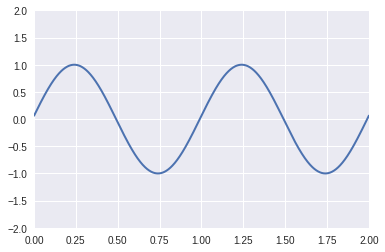

In [91]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

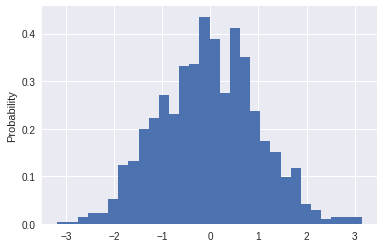

In [13]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

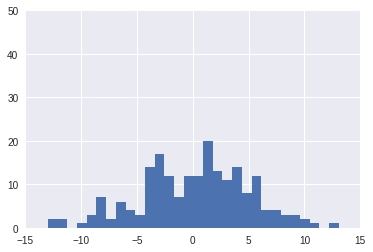

In [3]:
## Histogram
mean = 0
variance = 5
y_lim = 50
frames_number = 200
bins_number = 30
sample_list = []

def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    def setup():
        plt.cla()
        ax.set_xlim((-3*variance, 3*variance))
        ax.set_ylim(0, y_lim)
    
    # animation function. This is called sequentially
    def sin(i):
        setup()
        ax.hist(sample_list, bins=bins_number)
        sample = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
        sample_list.append(sample)

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin,
                                   frames=frames_number, interval=200)
    return HTML(anim.to_jshtml())
  
animate()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


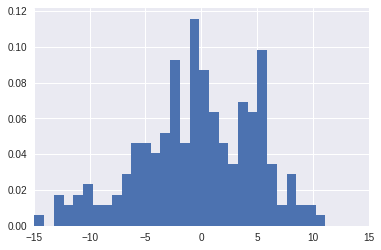

In [7]:
## Density function
mean = 0
variance = 5
#y_lim = 50
frames_number = 200
bins_number = 30
#sample_list = []

def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    def setup():
        plt.cla()
        ax.set_xlim((-3*variance, 3*variance))
        #ax.set_ylim(0, y_lim)
    
    # animation function. This is called sequentially
    def sin(i):
        setup()
        ax.hist(sample_list[:i], density=True, bins=bins_number)
        sample = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
        sample_list.append(sample)

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin,
                                   frames=frames_number, interval=200)
    return HTML(anim.to_jshtml())
  
animate()

## Task 2

In [0]:
## Insert solution here